In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [157]:
from pytrends.request import TrendReq

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [158]:
y = pd.read_csv('AAPL_quarterly_financials.csv')

In [159]:
y.index = y.name

In [160]:
y=pd.DataFrame(y.loc["BasicEPS",:]).iloc[2:,:]

In [161]:
y.index = pd.to_datetime(y.index)

In [162]:
y = y.fillna(0.).sort_index()

In [163]:
# assumptions nulls are 0. need to investigate 

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [187]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Layoffs", "MacBook", "Apple CEO","Apple Share Price", "Recession", "Chip Cost", "Apple Care", "Find My", "Apple TV", "Iphone Charge Time", "New Iphone Release Date", "Iphone Price","Taylor Swift Tickets", "Is the Earth Flat", "Hospital"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [188]:
X = df.resample("Q").mean()

In [189]:
temp =pd.concat([y,X], axis=1).dropna()
y =temp["BasicEPS"].copy()
X =temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
scaler = StandardScaler()

In [192]:
X_scaled = scaler.fit_transform(X)

# 3.) Run a Lasso with lambda of .1. Plot a bar chart.

In [193]:
from sklearn.linear_model import Lasso 

In [194]:
lasso = Lasso(alpha =0.1)

In [195]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [196]:
coefficients = lasso.coef_

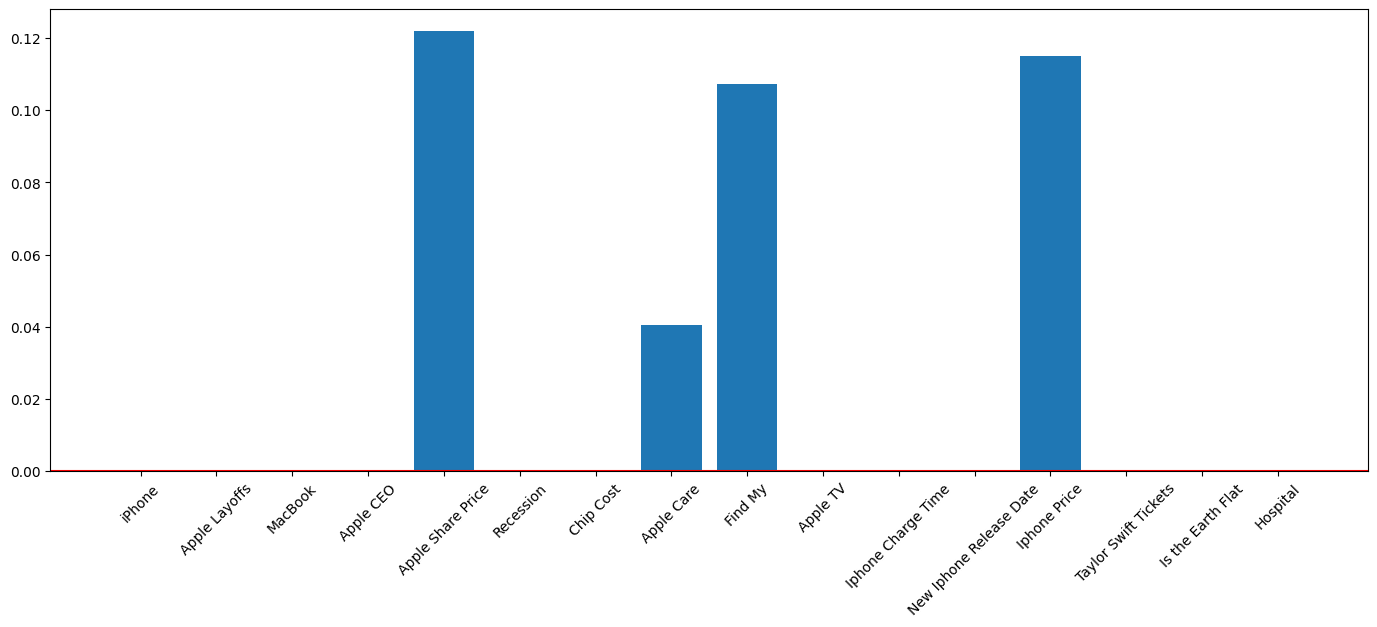

In [197]:
plt.figure(figsize = (17,6))
plt.bar(range(len(coefficients)),coefficients,
        tick_label = X.columns)
plt.xticks(rotation = 45)
plt.axhline(0., color = "red")
plt.show()

# 4.) Do these coefficient magnitudes make sense?

Yes, they do, since all these google searches (trends) influence Apple Stock. The biggest magnitude has Aplle Share Price, following New Iphone Release Date, and then we fave a unique apple feature called Find My, folowing by Apple Care.